# Youjung Park
## DA320 - Detecting Outliers
### 05/12/2023

In [1]:
import json

# Retrieve credentials to connect to mongodb
with open('mongo.credentials.json') as f:
    data = json.load(f)
    connection_string = data['mongodb']

In [2]:
import pymongo
import certifi

# Connect to the server and retrieve the database in mongodb
client = pymongo.MongoClient(connection_string, tlsCAFile=certifi.where())

# Open the database in mongodb
db_da320 = client.DA320

# Open the collection in mongodb
collections = db_da320.list_collection_names()

# Print mongodb info and collections to check if it has connected correctly
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {collections}")

Using MongoDB version 6.0.6.
This database has the collections ['metacritic_movie', 'imdb_Superhero', 'IMDB_Pipeline_View']


In [3]:
import pandas as pd
# Read collection name "IMDB_Pipeline_View"
pipeline_view = db_da320.IMDB_Pipeline_View

# Retrieve all data from the collection
cursor = pipeline_view.find()

# Convert the data into a Pandas Dataframe
imdb = pd.DataFrame(cursor)

# Print the data to verify the written code
print(f"{len(imdb)} movie found.")
imdb.head()


12632 movie found.


,_id,ID,Runtime,Title,User_Rating,Votes,Budget,Opening_Weekend,Gross_Sales,Release_Date,Genres,Cast,Director,Producer,Company,MPAA_split,MPAA_Rating
0,6451922be89fe01a69f15c3a,77631,110,Grease,7.2,265183,6000000,60759.0,394955690.0,1978-06-13,"[Comedy, Musical, Romance]","[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]",None,"[TV-14, (D)]",TV-14
1,6451922be89fe01a69f15c3b,78346,143,Superman,7.4,172769,55000000,7465343.0,166200000.0,1978-12-10,"[Action, Adventure, Sci-Fi]","[Marlon Brando, Gene Hackman, Christopher Reev...",[Richard Donner],"[Charles Greenlaw, Richard Lester, Alexander S...",None,"[TV-PG, (LV)]",TV-PG
2,6451922be89fe01a69f15c3c,77416,183,The Deer Hunter,8.1,334827,15000000,NaN,NaN,1978-12-08,"[Drama, War]","[Robert De Niro, John Cazale, John Savage, Chr...",[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deeley...",None,[R],R
3,6451922be89fe01a69f15c3d,77651,91,Halloween,7.7,267109,300000,NaN,70000000.0,1978-10-25,"[Horror, Thriller]","[Donald Pleasence, Jamie Lee Curtis, Nancy Kye...",[John Carpenter],"[Moustapha Akkad, John Carpenter, Debra Hill, ...",None,[TV-14],TV-14
4,6451922be89fe01a69f15c3e,77975,109,National Lampoon's Animal House,7.4,119917,3000000,201747.0,3371006.0,1978-07-27,[Comedy],"[Tom Hulce, Stephen Furst, Mark Metcalf, Mary ...",[John Landis],"[Ivan Reitman, Matty Simmons]",None,"[TV-14, (DLSV, TV Rating.)]",TV-14


In [4]:
from matplotlib import pyplot
import numpy as np

There are 1361 Sci-Fi movies.


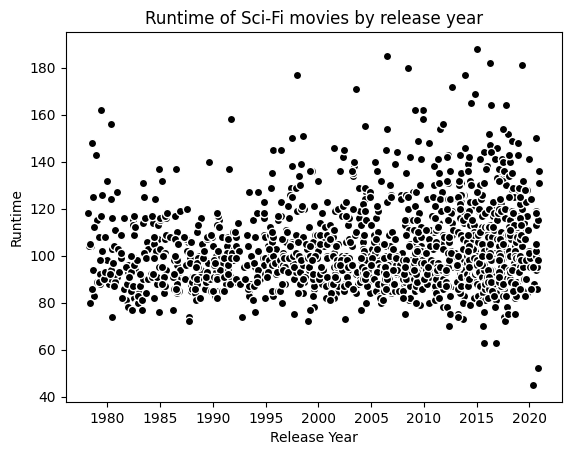

In [5]:
# Retrieve all movies where genre is Sci-Fi from the collection
cursor_genre = pipeline_view.find({"Genres" : {"$in" : ["Sci-Fi"]}})
sci_fi_movies = pd.DataFrame(cursor_genre)

print(f"There are {len(sci_fi_movies)} Sci-Fi movies.")

# Plot release year by runtime
pyplot.scatter(sci_fi_movies.Release_Date , sci_fi_movies.Runtime, color="black", ec="white")
pyplot.title("Runtime of Sci-Fi movies by release year")
pyplot.xlabel("Release Year")
pyplot.ylabel("Runtime")
pyplot.show()


There are 373 movies released in year 2019.


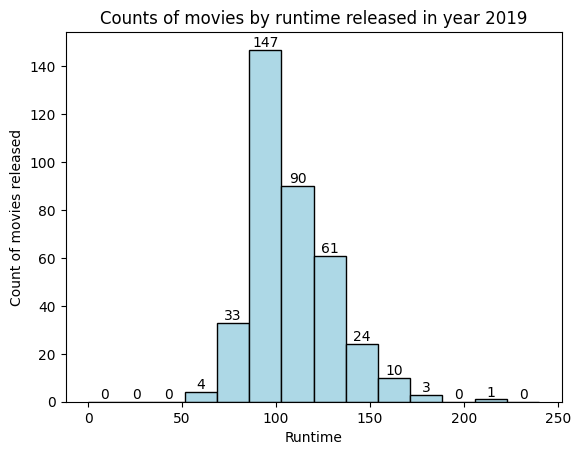

In [6]:
import datetime
# Retrieve all movies released in year 2019
cursor_year = pipeline_view.find({"Release_Date" : {"$lt" : datetime.datetime(2020,1,1,0,0,0,0), "$gt" : datetime.datetime(2018,12,31,0,0,0,0)}})
year_movies = pd.DataFrame(cursor_year)

print(f"There are {len(year_movies)} movies released in year 2019.")

# Plot count of movies by runtime
values, bins, bars = pyplot.hist(year_movies.Runtime, bins=14, range=(0,240), color="lightblue", ec="black")
pyplot.title("Counts of movies by runtime released in year 2019")
pyplot.xlabel("Runtime")
pyplot.ylabel("Count of movies released")
pyplot.bar_label(bars, fontsize=10, color="black")
pyplot.show()

There are 31 movies where Dwayne Johnson was casted.


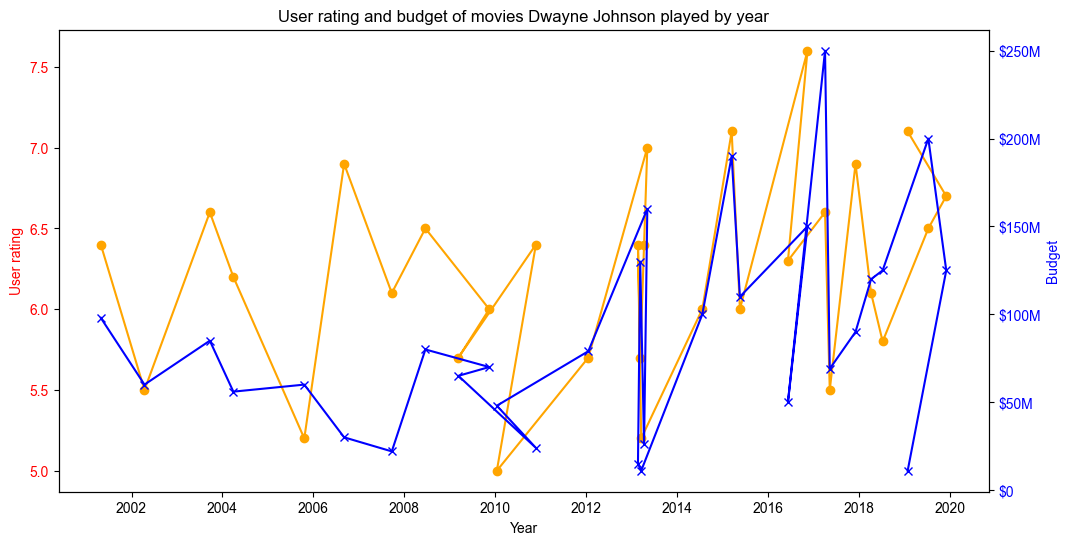

In [7]:
# Retrieve all movies played by Dwayne Johnson from collection
cursor_actor = pipeline_view.find({"Cast" : {"$in" : ["Dwayne Johnson"]}})
cast_movies = pd.DataFrame(cursor_actor)

print(f"There are {len(cast_movies)} movies with Dwayne Johnson.")

# Plot user rating and budget of movies played by Dwayne Johnson by year
fig, ax1 = pyplot.subplots(1, 1, figsize=(12,6))

# Plot user rating by release date
ax1.plot(cast_movies.Release_Date, cast_movies.User_Rating, color="orange", marker='o')
ax1.set_title("User rating and budget of movies Dwayne Johnson played by year")
ax1.set_xlabel("Year")
ax1.set_ylabel("User rating", color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Create twin axes to put budget by release date in the same chart
ax2 = ax1.twinx()

# Currency Fomatter
def format_currency(amount, _):
    if amount > 1000000:
        return f"${round(amount / 1000000)}M"
    elif amount > 1000:
        return f"${round(amount / 1000)}K"
    else:
        return f"${round(amount)}"
    
# Plot budget by release date     
ax2.set_ylabel("Budget", color="blue")
ax2.plot(cast_movies.Release_Date, cast_movies.Budget, color="blue", marker='x')
ax2.tick_params(axis='y', labelcolor="blue")
ax2.yaxis.set_major_formatter(format_currency)

# Insert gird
pyplot.style.use("seaborn-v0_8-whitegrid")
pyplot.show()

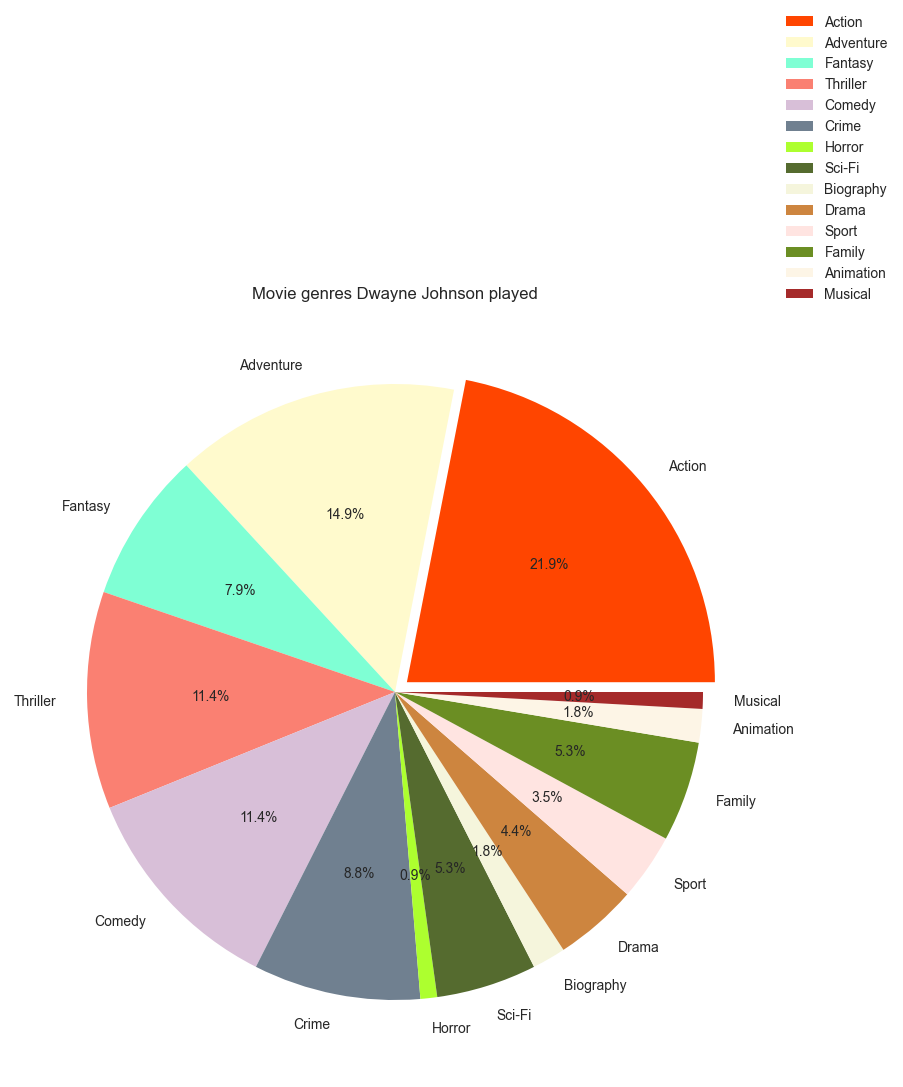

In [13]:
from collections import Counter
import matplotlib.colors as pltc
from random import sample

# Retrieve all movies played by Dwayne Johnson from collection 
cursor_actor = pipeline_view.find({"Cast" : {"$in" : ["Dwayne Johnson"]}})
cast_movies = pd.DataFrame(cursor_actor)

# Join cast_movies.Genres into a single list with duplicates
merge_genre = sum(cast_movies.Genres, [])

# Count each genre in the new list
count = Counter(merge_genre)

# Create pandas dataframe
genres = pd.DataFrame.from_dict(count, orient="index").reset_index()
genres = genres.rename(columns={"index": "Genre", 0: "Count"})

# Set the biggest value to explode in the pie chart
explode = ((genres.Count == max(genres.Count)).astype(int) / 20).tolist()

# Select random colors 
all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, len(genres.Count))

# Plot pie chart
fig, ax = pyplot.subplots(figsize=(10,10))
ax.pie(genres.Count, labels=genres.Genre, autopct='%1.1f%%', explode=explode, colors=colors)
ax.set_title("Movie genres Dwayne Johnson played")
ax.legend(genres.Genre, loc=(1,1), shadow=True)
pyplot.show()


# Aggregation Pipeline code
 ```
 (
 [
    {
        '$project': {
            'ID': '$id', 
            'Runtime': {
                '$convert': {
                    'input': '$runtime', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'Title': '$title', 
            'User_Rating': {
                '$convert': {
                    'input': '$user_rating', 
                    'to': 'double', 
                    'onError': None
                }
            }, 
            'Votes': {
                '$convert': {
                    'input': '$votes', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'Budget': {
                '$convert': {
                    'input': '$budget', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'Opening_Weekend': {
                '$convert': {
                    'input': '$opening_weekend', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'Gross_Sales': {
                '$convert': {
                    'input': '$gross_sales', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'Release_Date': {
                '$convert': {
                    'input': '$release_date', 
                    'to': 'date', 
                    'onError': None
                }
            }, 
            'Genres': {
                '$map': {
                    'input': {
                        '$split': [
                            '$genres', ','
                        ]
                    }, 
                    'as': 'genres_split', 
                    'in': {
                        '$trim': {
                            'input': '$$genres_split'
                        }
                    }
                }
            }, 
            'Cast': {
                '$map': {
                    'input': {
                        '$split': [
                            '$cast', ','
                        ]
                    }, 
                    'as': 'cast_split', 
                    'in': {
                        '$trim': {
                            'input': '$$cast_split'
                        }
                    }
                }
            }, 
            'Director': {
                '$map': {
                    'input': {
                        '$split': [
                            '$director', ','
                        ]
                    }, 
                    'as': 'director_split', 
                    'in': {
                        '$trim': {
                            'input': '$$director_split'
                        }
                    }
                }
            }, 
            'Producer': {
                '$map': {
                    'input': {
                        '$split': [
                            '$producer', ','
                        ]
                    }, 
                    'as': 'producer_split', 
                    'in': {
                        '$trim': {
                            'input': '$$producer_split'
                        }
                    }
                }
            }, 
            'Company': {
                '$convert': {
                    'input': '$company', 
                    'to': 'str', 
                    'onError': None
                }
            }, 
            'Company': {
                '$map': {
                    'input': {
                        '$split': [
                            '$Company', ','
                        ]
                    }, 
                    'as': 'company_split', 
                    'in': {
                        '$trim': {
                            'input': '$$company_split'
                        }
                    }
                }
            }, 
            'MPAA_split': {
                '$map': {
                    'input': {
                        '$split': [
                            '$mpaa_rating', '::'
                        ]
                    }, 
                    'as': 'mpaa_rating_split', 
                    'in': {
                        '$trim': {
                            'input': '$$mpaa_rating_split'
                        }
                    }
                }
            }
        }
    }, {
        '$addFields': {
            'MPAA_Rating': {
                '$arrayElemAt': [
                    '$MPAA_split', 0
                ]
            }
        }
    }, {
        '$match': {
            'Budget': {
                '$lt': 500000000
            }, 
            'Runtime': {
                '$lt': 240
            }
        }
    }
]
)
```